<a href="https://colab.research.google.com/github/superahxd/sec1_project/blob/main/sec1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💥GOAL

다음 분기에 어떤 게임을 설계해야 할까

1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

# 🕹️ Data Description
Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

In [3]:
import pandas as pd
import numpy as np

vgames = pd.read_csv('/content/vgames2.csv')

In [4]:
vgames.head(34)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


In [5]:
vgames=vgames.replace('N/A',np.nan)
vgames=vgames.dropna()

In [6]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    return float(x)


vgames['NA_Sales']=vgames['NA_Sales'].apply(value_to_float)
vgames['EU_Sales']=vgames['EU_Sales'].apply(value_to_float)
vgames['JP_Sales']=vgames['JP_Sales'].apply(value_to_float)
vgames['Other_Sales']=vgames['Other_Sales'].apply(value_to_float)

In [7]:
def million(x):
 if x <= 100:
   return x * 1000000.0
 else: return x

vgames['NA_Sales']=vgames['NA_Sales'].apply(million)
vgames['EU_Sales']=vgames['EU_Sales'].apply(million)
vgames['JP_Sales']=vgames['JP_Sales'].apply(million)
vgames['Other_Sales']=vgames['Other_Sales'].apply(million)

In [8]:
def division(x):
  if x > 0:
    return x / 1000
  else: return x

vgames['NA_Sales']=vgames['NA_Sales'].apply(division)
vgames['EU_Sales']=vgames['EU_Sales'].apply(division)
vgames['JP_Sales']=vgames['JP_Sales'].apply(division)
vgames['Other_Sales']=vgames['Other_Sales'].apply(division)

In [9]:
def year(x):
  if x >= 80 and x <= 100:
   return x + 1900
  elif x < 80:
   return x + 2000
  else : return float(x)

vgames['Year']=vgames['Year'].apply(year)

In [10]:
vgames=vgames.iloc[:,1:]
vgames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50.0,50.0,250.0,30.0


1. 🌏지역에 따른 게임 장르 선호도

지역에 따라서 선호하는 게임 장르가 다를까



In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
vgames['Genre'] = vgames['Genre'].dropna()
vgames_1=vgames.iloc[:,3:]
vgames_1

,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,Destineer,40.0,0.0,0.0,0.0
1,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...
16593,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Action,Tecmo Koei,50.0,50.0,250.0,30.0


In [13]:
vgames_sum= vgames_1.groupby(['Genre']).sum()
vgames_sum= vgames_sum.T

In [14]:
vgames_mean= vgames_1.groupby(['Genre']).mean()
vgames_mean= vgames_mean.T
vgames_mean

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,265.046296,80.276025,263.892216,234.818560,510.171821,214.805654,290.976210,217.583618,448.812500,214.456265,290.239234,101.390135
EU_Sales,158.530864,50.205047,119.640719,123.825104,229.816724,89.169611,192.797375,124.976109,242.367188,133.557920,161.361462,66.995516
JP_Sales,48.333333,40.906940,104.359281,61.975015,149.518900,99.363958,46.201805,234.081911,29.828125,75.106383,58.616790,73.393124
Other_Sales,56.787037,13.170347,43.293413,43.212374,58.934708,21.978799,62.764561,38.723549,79.578125,37.021277,57.568508,16.786248


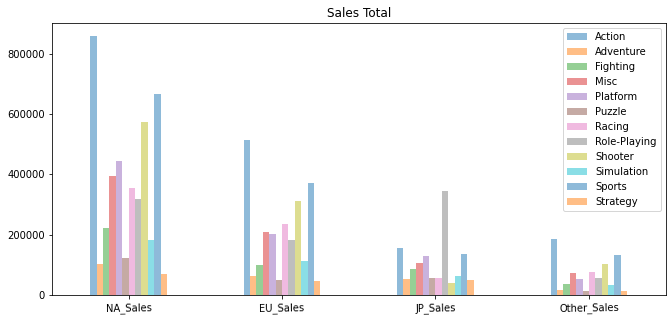

In [15]:
vgames_sum.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Sales Total')
plt.legend(loc='best')

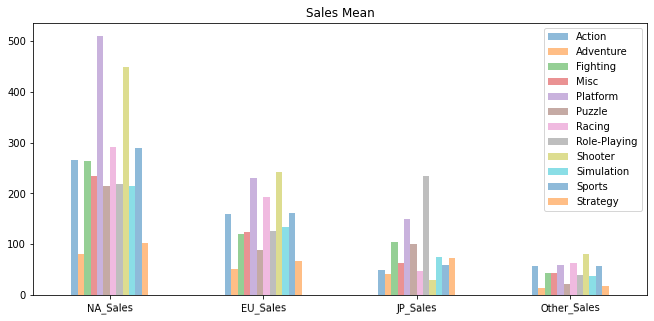

In [16]:
vgames_mean.plot(kind='bar',figsize=(11,5), rot=1, legend='reverse', alpha = 0.5, title='Sales Mean')
plt.legend(loc='best')

In [17]:
vgames_1.rank(method='min', ascending=False)

,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,13002.0,12572.0,9723.0,10635.0,6069.0,9923.0
1,13002.0,6789.0,5093.0,10635.0,6069.0,6555.0
2,11734.0,14613.0,11821.0,10635.0,4659.0,9923.0
3,9218.0,38.0,9723.0,10635.0,6069.0,9923.0
4,8345.0,12822.0,6343.0,4429.0,6069.0,3429.0
...,...,...,...,...,...,...
16593,8345.0,456.0,5508.0,6286.0,6069.0,6555.0
16594,13002.0,5446.0,11300.0,10635.0,6069.0,9923.0
16595,670.0,2250.0,2309.0,2735.0,4137.0,1279.0
16596,13002.0,1907.0,9204.0,5752.0,1206.0,4082.0



|인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Platform|Shooter|simulation|
|유럽|Shooter|Platform|Racing|
|일본|Role-Playing|Adventure|Fighting|
|그외|Shooter|Racing|Platform|

<br/>

|비인기종목 |1st | 2nd | 3rd |
|:-:|:-:|:-:|:-:|
|북미|Adventure	|Strategy|Sports|
|유럽|Adventure	|Strategy|Puzzle|
|일본|Shooter|Platform|Racing|
|그외|Adventure	|Strategy|Platform|


In [18]:
vgames_sum.T.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.986484,0.285377,0.974401
EU_Sales,0.986484,1.000000,0.278428,0.994272
JP_Sales,0.285377,0.278428,1.000000,0.263562
Other_Sales,0.974401,0.994272,0.263562,1.000000


In [19]:
vgames_mean.T.corr(method = 'pearson')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.942317,0.096376,0.848786
EU_Sales,0.942317,1.000000,-0.033686,0.951116
JP_Sales,0.096376,-0.033686,1.000000,-0.150381
Other_Sales,0.848786,0.951116,-0.150381,1.000000


2. 📅연도별 트랜드 변화
</br>장르별

In [20]:
vgames_2_Genre = vgames.iloc[:, 2:4]
vgames_2_Genre['sales'] = vgames.iloc[:, 5:].sum(axis = 1, skipna = True)
vgames_2_Genre

,Year,Genre,sales
0,2008.0,Action,40.0
1,2009.0,Action,180.0
2,2010.0,Adventure,20.0
3,2010.0,Misc,40.0
4,2010.0,Platform,250.0
...,...,...,...
16593,2006.0,Platform,200.0
16594,2005.0,Action,10.0
16595,2015.0,Sports,790.0
16596,2013.0,Action,380.0


In [46]:
pivot_vgames = pd.pivot_table(vgames_2_Genre, 'sales', 'Year', 'Genre', aggfunc='sum', fill_value=0)
#pivot_vgames['sum']=pivot_vgames.sum(axis = 1, skipna = True)
pivot_vgames.head()
pivot_index = pivot_vgames.index
pivot_columns= pivot_vgames.columns
pivot_index

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0],
             dtype='float64', name='Year')

In [22]:
pivot_sum = np.array(pivot_vgames.sum(axis = 1, skipna = True))
pivot_sum[0]

10880

In [34]:
pivot_array = np.array(pivot_vgames)
array_pivot=pd.DataFrame(pivot_array / pivot_array.sum(1, keepdims=True),
                         index=pivot_index, columns=pivot_columns)
array_pivot.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.031250,0.00000,0.070772,0.248162,0.000000,0.000000,0.000000,0.0,0.649816,0.000000,0.000000,0.0
1981.0,0.414518,0.00000,0.000000,0.000000,0.193946,0.063061,0.013453,0.0,0.280830,0.012332,0.021861,0.0
1982.0,0.225069,0.00000,0.000000,0.030125,0.174169,0.347645,0.054363,0.0,0.131925,0.000000,0.036704,0.0
1983.0,0.170238,0.02381,0.000000,0.127381,0.412500,0.046429,0.000000,0.0,0.029167,0.000000,0.190476,0.0
1984.0,0.036743,0.00000,0.000000,0.028798,0.013704,0.062363,0.118173,0.0,0.617676,0.000000,0.122542,0.0


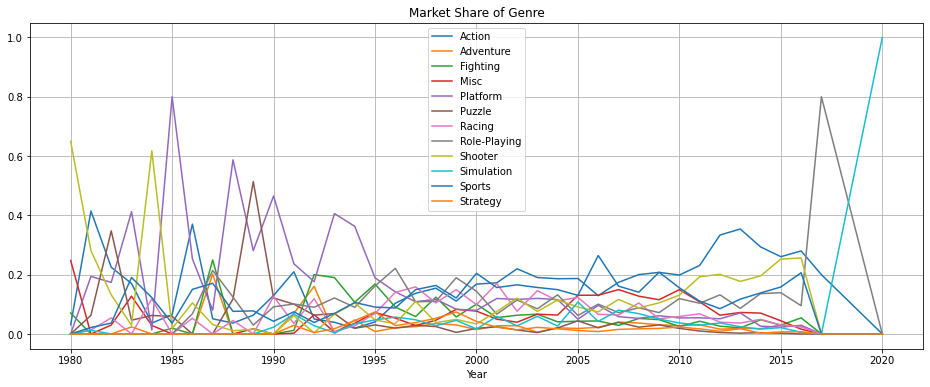

In [50]:
  array_pivot.plot(kind='line', 
                  figsize=(16,6), 
                  title='Market Share of Genre', 
                  grid=True)
  plt.legend(loc='best')

In [ ]:
플랫폼별

In [54]:
vgames_2_Platform = vgames.iloc[:, 1:3]
vgames_2_Platform

,Platform,Year
0,DS,2008.0
1,Wii,2009.0
2,PSP,2010.0
3,DS,2010.0
4,PS3,2010.0
...,...,...
16593,GC,2006.0
16594,PSP,2005.0
16595,PS3,2015.0
16596,PSV,2013.0
